#Music Genre Recognition using KNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#FINAL
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, IPython
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import librosa.display

# Load the features_3_sec.csv dataset
dataset = pd.read_csv('/content/drive/MyDrive/MusicGenre/features_3_sec.csv')
print(dataset.head())

# Split the dataset into features (X) and labels (y)
X = dataset.drop(columns=['filename', 'label'])
y = dataset['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("Model Trained.")

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

In [ ]:
# Convert y to category type
y = y.astype('category')

# Get unique categories (genres) and assign a color to each
unique_genres = y.unique()
num_genres = len(unique_genres)
color_scale = np.linspace(0, 1, num_genres)
colors = [f'rgb({int(255 * c)}, {int(255 * (1 - c))}, 100)' for c in color_scale]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a Plotly scatter plot
data = []
for i, genre in enumerate(unique_genres):
    mask = (y == genre)
    trace = go.Scatter3d(
        x=X_pca[mask, 0],
        y=X_pca[mask, 1],
        z=X_pca[mask, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[i],
            opacity=0.8),
        name=genre,
        text=y[mask].values
    )
    data.append(trace)

layout = go.Layout(
    title='3D PCA Plot with Genre Labels',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# def extract_features(audio_file):
#     y, sr = librosa.load(audio_file)
#     IPython.display.Audio(y, rate=sr)

#     chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#     rms = librosa.feature.rms(y=y)
#     spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
#     spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#     rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#     zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
#     harmony = librosa.effects.harmonic(y)
#     perceptr = librosa.effects.percussive(y)
#     tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

#     features = [
#         len(y), np.mean(chroma_stft), np.var(chroma_stft),
#         np.mean(rms), np.var(rms),
#         np.mean(spectral_centroid), np.var(spectral_centroid),
#         np.mean(spectral_bandwidth), np.var(spectral_bandwidth),
#         np.mean(rolloff), np.var(rolloff),
#         np.mean(zero_crossing_rate), np.var(zero_crossing_rate),
#         np.mean(harmony), np.var(harmony),
#         np.mean(perceptr), np.var(perceptr),
#         tempo
#     ]

#     for mfcc in mfccs:
#         features.extend([np.mean(mfcc), np.var(mfcc)])
#     return np.array(features)


In [ ]:
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    IPython.display.Audio(y, rate=sr)

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    harmony = librosa.effects.harmonic(y)
    perceptr = librosa.effects.percussive(y)

    # Extract the scalar tempo value correctly
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(tempo)  # Convert the array to a scalar float

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    features = []

    def ensure_scalar(value, name):
        if not np.isscalar(value):
            raise ValueError(f"Feature {name} is not scalar: {value}")
        return value

    features.append(ensure_scalar(len(y), "len(y)"))
    features.append(ensure_scalar(np.mean(chroma_stft), "chroma_stft mean"))
    features.append(ensure_scalar(np.var(chroma_stft), "chroma_stft var"))
    features.append(ensure_scalar(np.mean(rms), "rms mean"))
    features.append(ensure_scalar(np.var(rms), "rms var"))
    features.append(ensure_scalar(np.mean(spectral_centroid), "spectral_centroid mean"))
    features.append(ensure_scalar(np.var(spectral_centroid), "spectral_centroid var"))
    features.append(ensure_scalar(np.mean(spectral_bandwidth), "spectral_bandwidth mean"))
    features.append(ensure_scalar(np.var(spectral_bandwidth), "spectral_bandwidth var"))
    features.append(ensure_scalar(np.mean(rolloff), "rolloff mean"))
    features.append(ensure_scalar(np.var(rolloff), "rolloff var"))
    features.append(ensure_scalar(np.mean(zero_crossing_rate), "zero_crossing_rate mean"))
    features.append(ensure_scalar(np.var(zero_crossing_rate), "zero_crossing_rate var"))
    features.append(ensure_scalar(np.mean(harmony), "harmony mean"))
    features.append(ensure_scalar(np.var(harmony), "harmony var"))
    features.append(ensure_scalar(np.mean(perceptr), "perceptr mean"))
    features.append(ensure_scalar(np.var(perceptr), "perceptr var"))

    # Append the correctly converted scalar tempo value
    features.append(ensure_scalar(tempo, "tempo"))

    for idx, mfcc in enumerate(mfccs):
        features.append(ensure_scalar(np.mean(mfcc), f"mfcc mean {idx}"))
        features.append(ensure_scalar(np.var(mfcc), f"mfcc var {idx}"))

    return np.array(features)


In [ ]:
def graphs(audio_file):
        y, sr = librosa.load(audio_file)
        audio_file, _ = librosa.effects.trim(y)

        #Sound Wave
        plt.figure(figsize = (16,6))
        librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
        plt.title("Sound Waves of the audio", fontsize = 23);
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.show()
        print()

        #Harmonics and Perceptrual
        y_harm, y_perc = librosa.effects.hpss(audio_file)
        plt.figure(figsize = (16, 6))
        plt.plot(y_harm, color = '#A300F9');
        plt.plot(y_perc, color = '#FFB100');
        plt.title("Harmonics and Perceptrual", fontsize = 23);
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.show()
        print()

        #Plotting the Spectral Centroid along the waveform
        def normalize(x, axis=0):
            return sklearn.preprocessing.minmax_scale(x, axis=axis)
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        frames = range(len(spectral_centroids))
        t = librosa.frames_to_time(frames)

        plt.figure(figsize = (16, 6))
        librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
        plt.plot(t, normalize(spectral_centroids), color='#FFB100');
        plt.title("Spectral Centroids", fontsize = 23);
        plt.xlabel("Time")
        plt.ylabel("Spectral Centroid")
        plt.show()
        print()

        # Convert an amplitude spectrogram to Decibels-scaled spectrogram.
        n_fft = 2048 # FFT window size
        hop_length = 512 # number audio of frames between STFT columns
        D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))
        DB = librosa.amplitude_to_db(D, ref = np.max)

        plt.figure(figsize = (16, 6))
        librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                                cmap = 'cool')
        plt.colorbar();
        plt.title("Logarithmic 2D Spectrogram")
        plt.xlabel("Time")
        plt.ylabel("Log")
        plt.show()
        print()

        #3D Spectogram
        plt.figure(figsize=(15,15))
        X, Y = np.meshgrid(np.linspace(0, audio_file.shape[-1]/sr, num=D.shape[1]), np.linspace(0, 0.5 * sr, num=D.shape[0]))
        ax = plt.axes(projection='3d')
        ax.plot_surface(X, Y, librosa.power_to_db(D, ref=np.max), rstride=100, cstride=100, cmap='magma')
        ax.set_xlabel('Time')
        ax.set_ylabel('Frequency')
        ax.set_zlabel('Power (dB)')
        plt.title('3D Spectrogram')
        plt.show()

Enter the path to the audio file (.wav): /content/drive/MyDrive/newf/Smooth Operator.wav


<ipython-input-18-f14f7da70836>:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Predicted Genre: disco


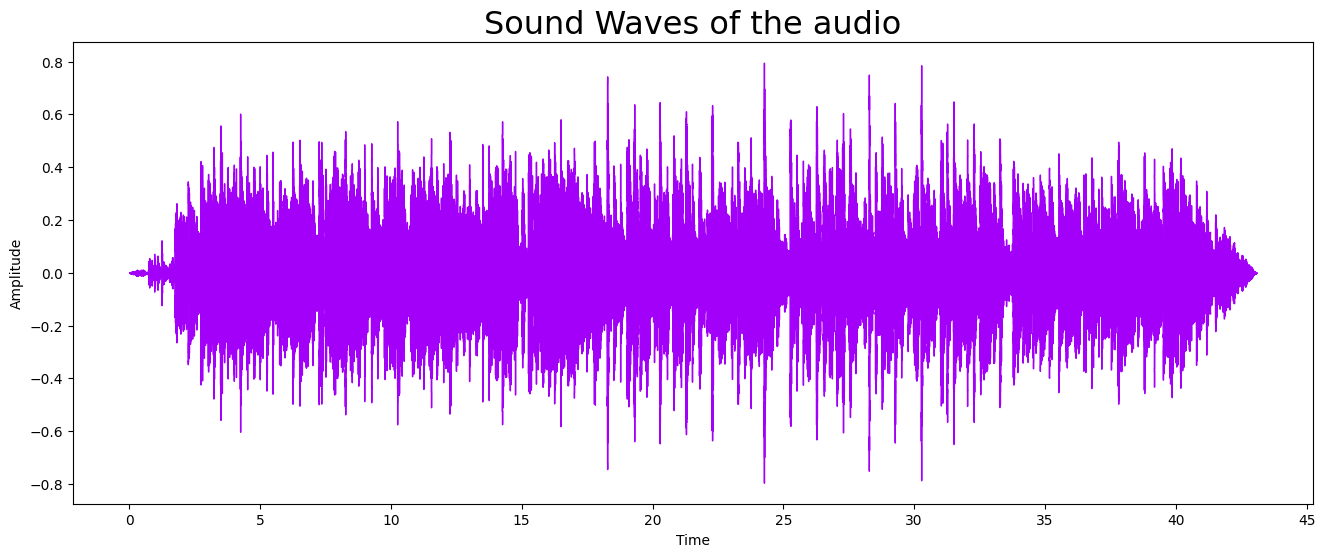

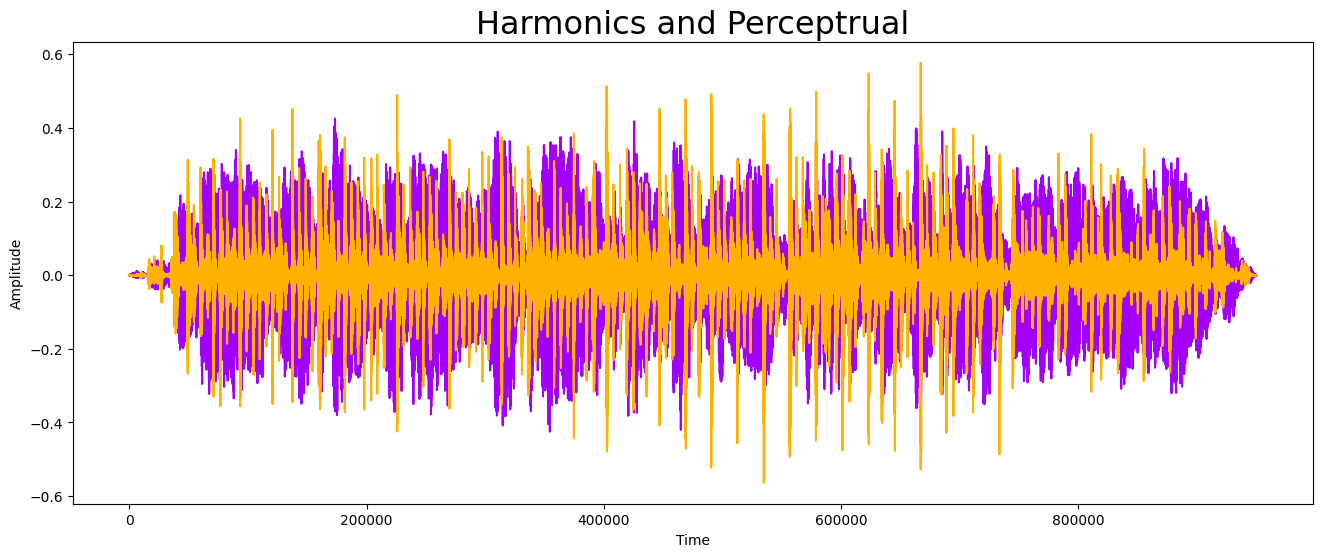

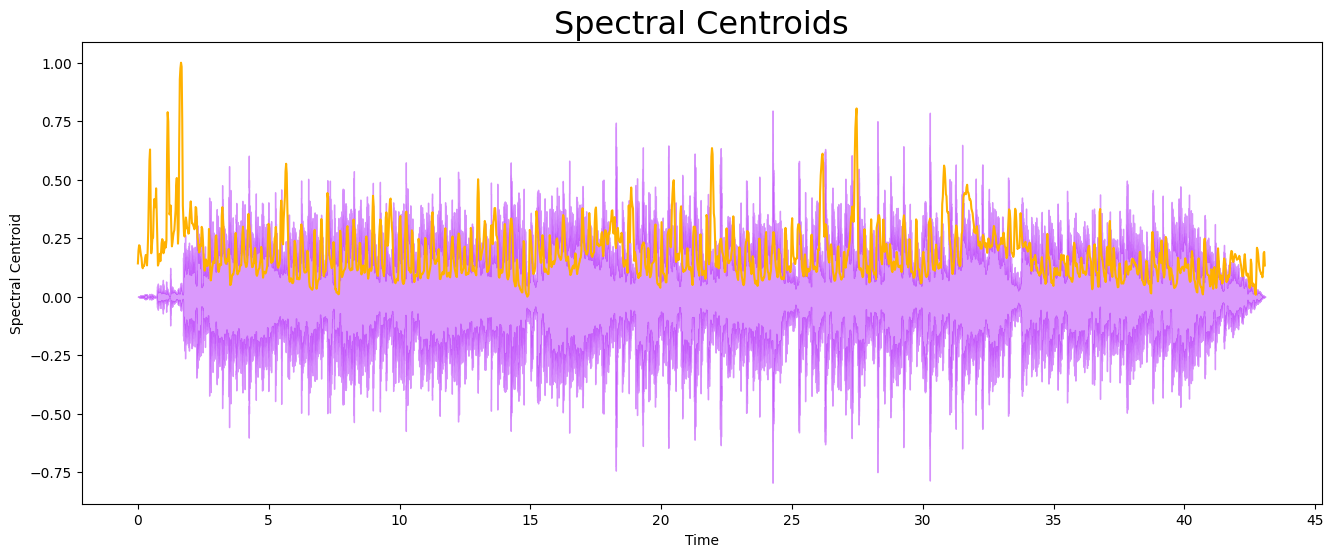

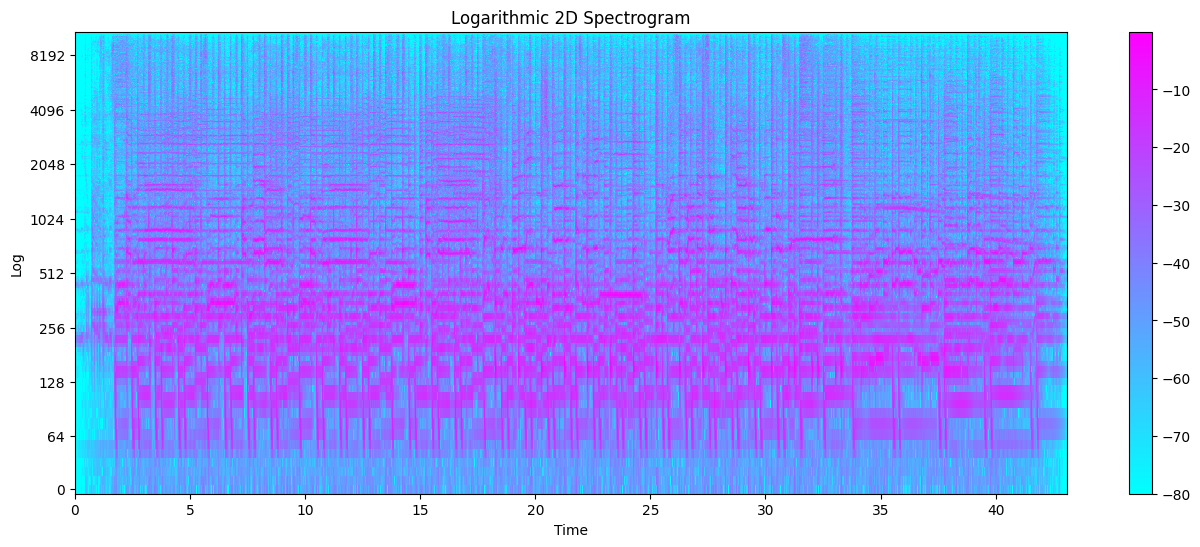

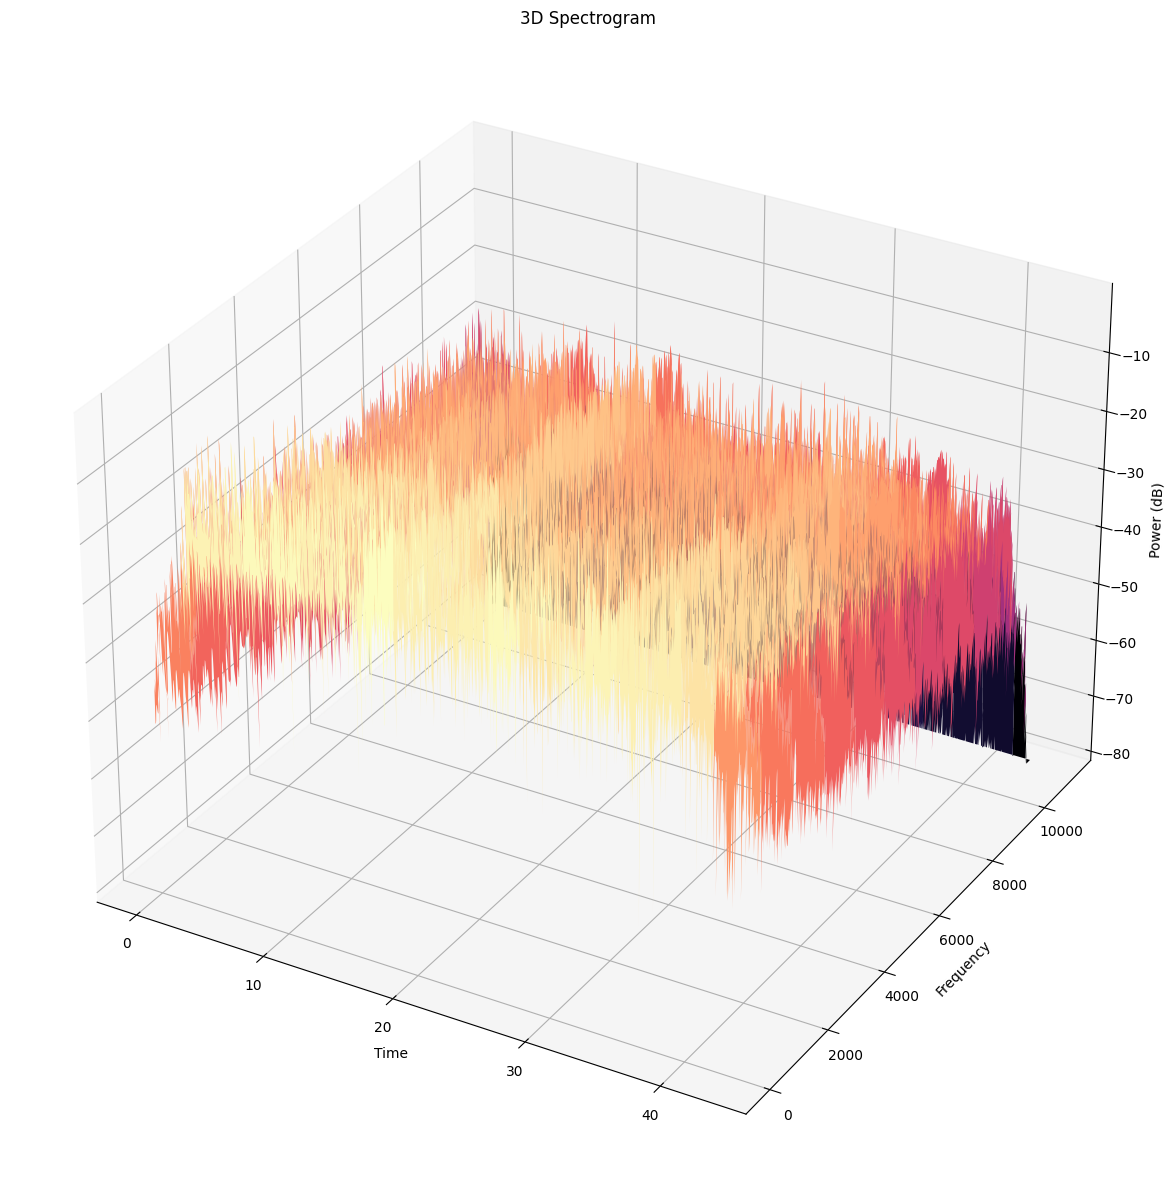

Audio: 


In [ ]:
import warnings
def user_warning_filter(message, category, filename, lineno, file=None, line=None):
    return category is UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

file = input("Enter the path to the audio file (.wav): ")

def predict_genre_from_audio():
    audio_features = extract_features(file)
    audio_features_scaled = scaler.transform([audio_features])
    predicted_genre = knn.predict(audio_features_scaled)[0]
    print("Predicted Genre:", predicted_genre)
    graphs1 = graphs(file)

predict_genre_from_audio()

signal, sr = librosa.load(file , sr = 22050)
print("Audio: ")
IPython.display.Audio(signal, rate=sr)